In [1]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 14.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from zipfile import ZipFile
import os
import zipfile

zip_filename = "/content/gdrive/MyDrive/archive_new(6).zip"
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()

In [4]:

import os

# List the files in the current directory
extracted_files = os.listdir()
print(extracted_files)

['.config', 'archive(6)', 'gdrive', 'sample_data']


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D,Conv2D,Activation, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization, MaxPool2D
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from keras import regularizers
import matplotlib.pyplot as plt
from mtcnn import MTCNN
from keras.optimizers import Adam
from keras.preprocessing.image import load_img, img_to_array




In [6]:
# Set batch size and image size
image_size = (48,48)
batch_size = 64
epochs = 100


In [7]:
# Define data paths
train_dir = '/content/archive(6)/train'
validation_dir = '/content/archive(6)/validation'
test_dir = '/content/archive(6)/validation'


In [8]:
# Define image and batch sizes
img_width, img_height = 48, 48
batch_size = 64

# Define the data generator with preprocessing options
train_datagen = ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Load and preprocess the validation data
val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load and preprocess the testing data
val_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [9]:
# Function to get all classes in the dataset directory
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
            print(label)
    return image_paths, labels


In [10]:
train = pd.DataFrame()
train['image'],train['label'] = createdataframe(train_dir)


Streaming output truncated to the last 5000 lines.
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad

In [11]:
print(train.head())


                                       image  label
0  /content/archive(6)/train/angry/17569.jpg  angry
1  /content/archive(6)/train/angry/35534.jpg  angry
2  /content/archive(6)/train/angry/23315.jpg  angry
3  /content/archive(6)/train/angry/17335.jpg  angry
4  /content/archive(6)/train/angry/10431.jpg  angry


In [12]:
validation = pd.DataFrame()
validation['image'],validation['label'] = createdataframe(validation_dir)


Streaming output truncated to the last 5000 lines.
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
h

In [13]:
print(validation.head())

                                            image  label
0  /content/archive(6)/validation/angry/35681.jpg  angry
1  /content/archive(6)/validation/angry/15848.jpg  angry
2  /content/archive(6)/validation/angry/22309.jpg  angry
3  /content/archive(6)/validation/angry/21916.jpg  angry
4  /content/archive(6)/validation/angry/26337.jpg  angry


In [14]:
test = pd.DataFrame()
test['image'],test['label'] = createdataframe(test_dir)


Streaming output truncated to the last 5000 lines.
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
h

In [15]:
print(test.head())


                                            image  label
0  /content/archive(6)/validation/angry/35681.jpg  angry
1  /content/archive(6)/validation/angry/15848.jpg  angry
2  /content/archive(6)/validation/angry/22309.jpg  angry
3  /content/archive(6)/validation/angry/21916.jpg  angry
4  /content/archive(6)/validation/angry/26337.jpg  angry


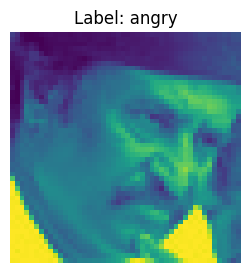

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the train_dir path
train_dir = '/content/test'

file_path = train['image'].iloc[0]
label = train['label'].iloc[0]

# Read and display the image
image = mpimg.imread(file_path)
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

In [17]:
from tqdm.notebook import tqdm
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [18]:
train_features = extract_features(train['image'])


  0%|          | 0/28821 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [19]:
validation_features = extract_features(validation['image'])


  0%|          | 0/7066 [00:00<?, ?it/s]

In [20]:
test_features = extract_features(test['image'])


  0%|          | 0/7066 [00:00<?, ?it/s]

In [21]:
x_train = train_features/255.0
x_test = test_features/255.0
x_validation = validation_features/255.0


In [22]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])
y_validation = le.transform(validation['label'])


In [23]:
# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)
y_validation = to_categorical(y_validation, num_classes=7)


In [25]:
model = tf.keras.models.Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape =(48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.summary()


 batch_normalization_2 (Bat  (None, 24, 24, 128)       512       
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 batch_normalization_3 (Bat  (None, 24, 24, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 batch_nor

In [26]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
# Compile the model
optimizer = Adam(lr=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Implement callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')


In [27]:
# Train the model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    verbose=1,
    epochs=50,
    validation_data=(x_validation, y_validation),
    callbacks=[lr_scheduler, early_stopping, model_checkpoint]
)

Epoch 1/50
451/451 [==============================] - ETA: 0s - loss: 8.5074 - accuracy: 0.2250

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/451 [==============================] - 46s 75ms/step - loss: 8.5074 - accuracy: 0.2250 - val_loss: 2.9108 - val_accuracy: 0.2583 - lr: 0.0010
Epoch 2/50
451/451 [==============================] - 29s 64ms/step - loss: 2.1843 - accuracy: 0.3317 - val_loss: 2.2107 - val_accuracy: 0.2557 - lr: 0.0010
Epoch 3/50
451/451 [==============================] - 29s 65ms/step - loss: 1.8833 - accuracy: 0.4263 - val_loss: 1.8363 - val_accuracy: 0.4478 - lr: 0.0010
Epoch 4/50
451/451 [==============================] - 30s 66ms/step - loss: 1.8533 - accuracy: 0.4515 - val_loss: 1.9392 - val_accuracy: 0.4244 - lr: 0.0010
Epoch 5/50
451/451 [==============================] - 29s 64ms/step - loss: 1.8427 - accuracy: 0.4552 - val_loss: 1.9496 - val_accuracy: 0.4080 - lr: 0.0010
Epoch 6/50
451/451 [==============================] - 30s 65ms/step - loss: 1.8515 - accuracy: 0.4629 - val_loss: 1.8769 - val_accuracy: 0.4609 - lr: 0.0010
Epoch 7/50
451/451 [==============================] - 29s 65ms/step -

In [28]:
model.evaluate(x_train,y_train)

901/901 [==============================] - 9s 9ms/step - loss: 0.7194 - accuracy: 0.8292


[0.7194311022758484, 0.8292217254638672]

In [29]:
model.evaluate(x_validation,y_validation)

221/221 [==============================] - 2s 9ms/step - loss: 1.2438 - accuracy: 0.6623


[1.2438042163848877, 0.6623266339302063]

In [30]:
model.evaluate(x_test,y_test)

221/221 [==============================] - 2s 9ms/step - loss: 1.2438 - accuracy: 0.6623


[1.2438042163848877, 0.6623266339302063]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 451}

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [34]:
len(history.history['loss'])
type(history.history['loss'])

list

In [35]:
history.history['loss'][:5]

[8.507428169250488,
 2.184262275695801,
 1.8832967281341553,
 1.8532969951629639,
 1.842669129371643]

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

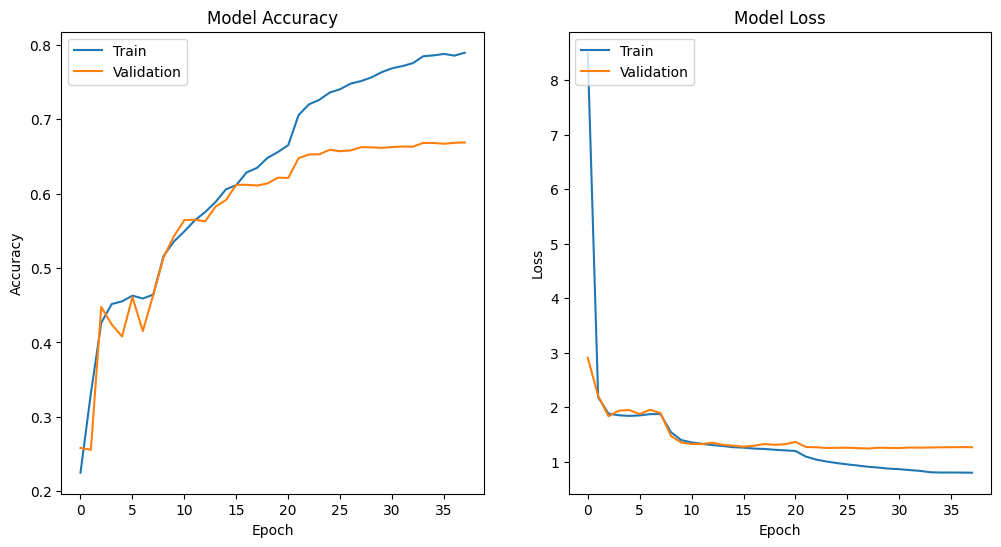

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [38]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0


In [39]:
preds = model.predict(x_test)
y_pred = np.argmax(preds , axis = 1 )

221/221 [==============================] - 2s 8ms/step


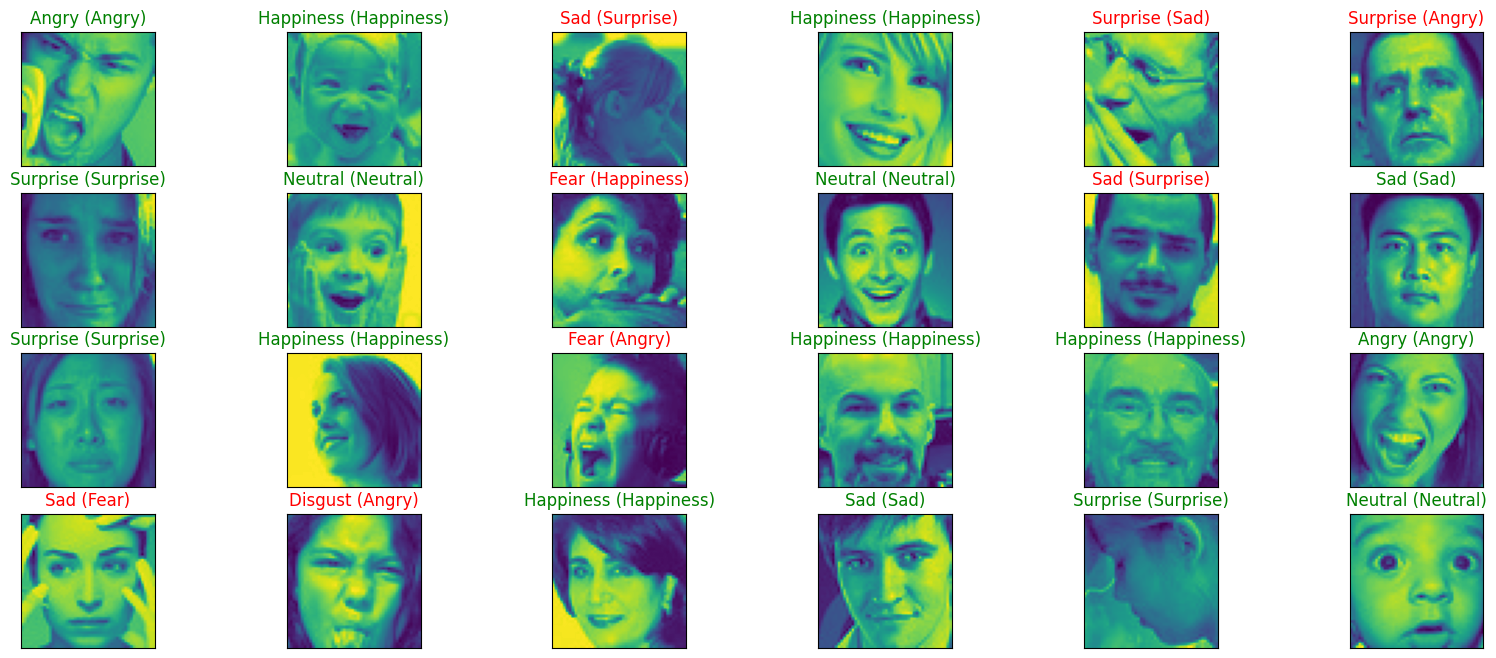

In [51]:
label = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))

    if y_pred.ndim == 1:
        predict_index = label[int(y_pred[index])]
    else:
        predict_index = label[np.argmax(y_pred, axis=1)[index]]

    true_index = label[np.argmax(y_test, axis=1)[index]]

    ax.set_title("{} ({})".format(predict_index, true_index),
                 color=("green" if predict_index == true_index else "red"))

plt.show()


In [52]:
from tensorflow.keras.models import model_from_json
# Save the model architecture to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to HDF5
model.save_weights("model_emotion.h5")

# Load the model architecture from JSON
with open("model.json", "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)

# Load the model weights
loaded_model.load_weights("model_emotion.h5")

In [53]:
import tensorflow as tf
from tensorflow.keras.models import model_from_json
import numpy as np

# Load the JSON model architecture
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)

# Load the weights into the model
loaded_model.load_weights('model_emotion.h5')

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model.tflite1', 'wb') as f:
    f.write(tflite_model)

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='model.tflite1')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [41]:
import os
model.save('emotion_detection')